In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


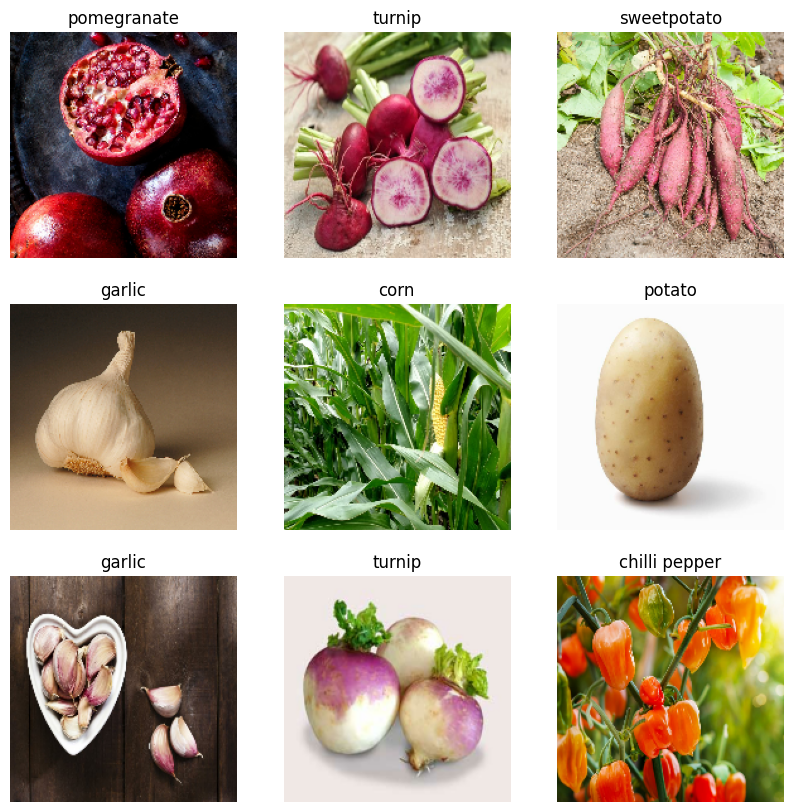

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10


98/98 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.5396 - loss: 1.5988 - val_accuracy: 0.8205 - val_loss: 0.8279
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.6908 - loss: 1.1015 - val_accuracy: 0.8803 - val_loss: 0.5601
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8225 - loss: 0.6354 - val_accuracy: 0.9088 - val_loss: 0.5134
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8752 - loss: 0.4539 - val_accuracy: 0.9316 - val_loss: 0.4796
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9108 - loss: 0.3800 - val_accuracy: 0.9487 - val_loss: 0.3083
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.9512 - loss: 0.1908 - val_accuracy: 0.9487 - val_loss: 0.3044
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9542 - loss: 0.1815 - val_accuracy: 0.9487 - val_loss: 0.3744
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 879ms/step - accuracy: 0.9634 - loss: 0.1719 - val_accuracy: 0.9487 - val_loss: 

Text(0.5, 1.0, 'Loss')

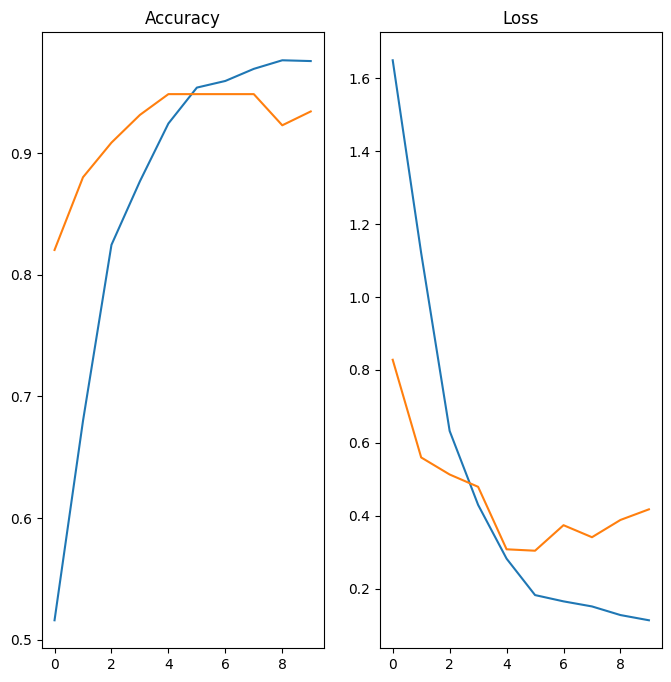

In [26]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [27]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [28]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


In [29]:
score = tf.nn.softmax(predict)

In [30]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 99.37


In [31]:
model.save('Image_classify.keras')